<a href="https://colab.research.google.com/github/yoonsoli/Machine_Learning_to_Study_Alone/blob/main/Chapter3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# k-최근접 이웃 회귀

In [1]:
import numpy as np

In [2]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
# 훈련 세트와 테스트 세트로 나눔
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42
)

In [5]:
# 훈련 세트와 테스트 세트를 2차원 배열로 바꿈
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [6]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)

# k-최근접 이웃 회귀 모델을 훈련함
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [12]:
print(knr.predict([[15]]))

[47.33333333]


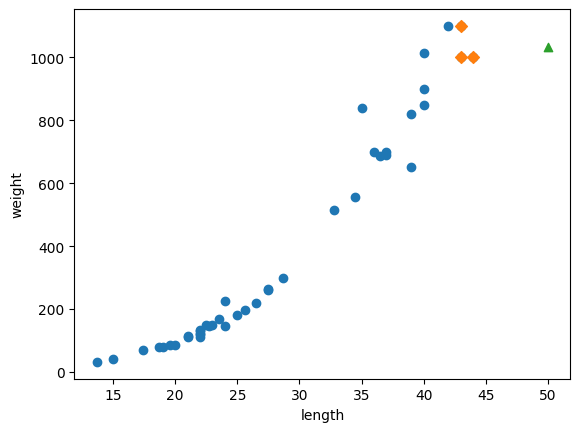

In [14]:
import matplotlib.pyplot as plt

# 50cm 농어의 이웃을 구함
distances, indexes = knr.kneighbors([[50]])

# 훈련 세트의 산점도를 그림
plt.scatter(train_input, train_target)

# 훈련 세트 중에서 이웃 샘플만 다시 그림
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 50cm 농어 데이터
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [15]:
# 이웃 샘플의 타깃의 평균
print(np.mean(train_target[indexes]))

1033.3333333333333


In [16]:
# 새로운 샘플이 훈련 세트의 범위를 벗어나면 엉뚱한 값을 예축함 -> 100cm인 농어도 1,033g으로 예측했음
print(knr.predict([[100]]))

[1033.33333333]
